In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [76]:
df = pd.read_csv('randomForest.csv')

In [77]:
scalar = df[df.type == 'scalar']
scalar = scalar[scalar['module'].str.contains("appl")]
scalar = scalar[['run','name','value']]
scalar.head()

,run,name,value
13987,General-110-20190306-12:47:47-5553,generatedWSMs,0.0
13988,General-110-20190306-12:47:47-5553,receivedWSMs,5142.0
13989,General-110-20190306-12:47:47-5553,generatedBSMs,0.0
13990,General-110-20190306-12:47:47-5553,receivedBSMs,0.0
13991,General-110-20190306-12:47:47-5553,generatedWSAs,0.0


In [78]:
iteration_vars = df[(df.type=='runattr') & (df.attrname == 'iterationvarsf')]

In [79]:
iteration_vars.head()

,run,type,module,name,attrname,attrvalue,value
5,General-113-20190306-12:47:55-5553,runattr,NaN,NaN,iterationvarsf,"10,.5,150,2-",NaN
116,General-110-20190306-12:47:47-5553,runattr,NaN,NaN,iterationvarsf,"10,.5,100,1-",NaN
227,General-112-20190306-12:47:53-5553,runattr,NaN,NaN,iterationvarsf,"10,.5,150,1-",NaN
338,General-111-20190306-12:47:49-5553,runattr,NaN,NaN,iterationvarsf,"10,.5,100,2-",NaN
449,General-109-20190306-12:47:43-5553,runattr,NaN,NaN,iterationvarsf,"10,.5,50,2-",NaN


In [80]:
run_attrs_dict = defaultdict(list)
for index, row in iteration_vars.iterrows():
    run_attrs =  row['attrvalue']
    run_attrs_arr = run_attrs.split(',')
    run_attrs_dict['number_mcs'].append(run_attrs_arr[0])
    run_attrs_dict['expected_reliability'].append(run_attrs_arr[1])
    run_attrs_dict['computation_task'].append(run_attrs_arr[2])
    run_attrs_dict['replication_factor'].append(run_attrs_arr[3][:len(run_attrs_arr[3])-1])
    run_attrs_dict['run'].append(row['run'])
run_attrs_df = pd.DataFrame(run_attrs_dict)

In [81]:
run_attrs_df.head()

,number_mcs,expected_reliability,computation_task,replication_factor,run
0,10,.5,150,2,General-113-20190306-12:47:55-5553
1,10,.5,100,1,General-110-20190306-12:47:47-5553
2,10,.5,150,1,General-112-20190306-12:47:53-5553
3,10,.5,100,2,General-111-20190306-12:47:49-5553
4,10,.5,50,2,General-109-20190306-12:47:43-5553


In [82]:
final_df = scalar.join(run_attrs_df.set_index('run'), on='run')

In [83]:
final_df

,run,name,value,number_mcs,expected_reliability,computation_task,replication_factor
13987,General-110-20190306-12:47:47-5553,generatedWSMs,0.0,10,.5,100,1
13988,General-110-20190306-12:47:47-5553,receivedWSMs,5142.0,10,.5,100,1
13989,General-110-20190306-12:47:47-5553,generatedBSMs,0.0,10,.5,100,1
13990,General-110-20190306-12:47:47-5553,receivedBSMs,0.0,10,.5,100,1
13991,General-110-20190306-12:47:47-5553,generatedWSAs,0.0,10,.5,100,1
13992,General-110-20190306-12:47:47-5553,receivedWSAs,0.0,10,.5,100,1
14007,General-110-20190306-12:47:47-5553,Micro-cloud : 0 work finished,5900.0,10,.5,100,1
14008,General-110-20190306-12:47:47-5553,Micro-cloud : 1 work finished,8300.0,10,.5,100,1
14009,General-110-20190306-12:47:47-5553,Micro-cloud : 2 work finished,1500.0,10,.5,100,1
14010,General-110-20190306-12:47:47-5553,Micro-cloud : 3 work finished,19700.0,10,.5,100,1


In [84]:
final_df = final_df[final_df.name=='Load Balancer : 2 work finished']
final_df = final_df[final_df.value>5000]

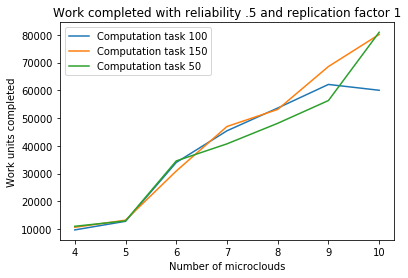

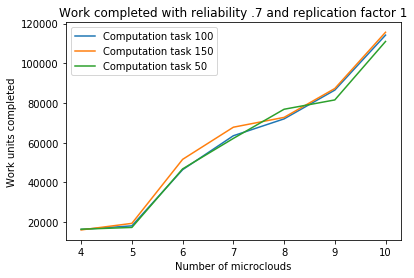

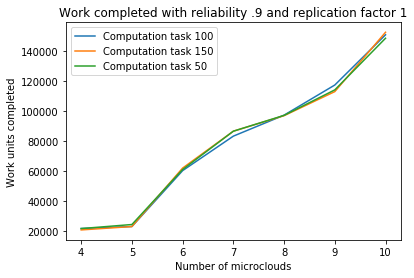

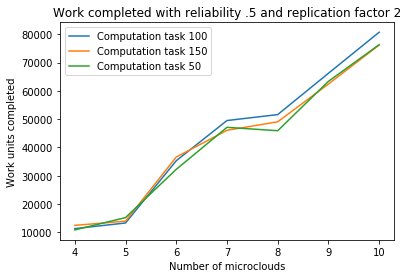

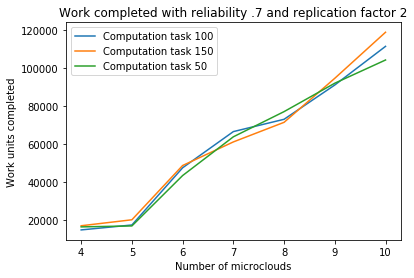

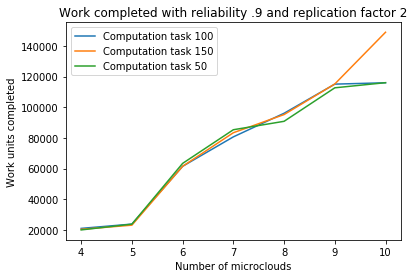

In [85]:
plot_work_to_num_mcs(final_df)

In [11]:
def plot_work_to_num_mcs(df):
    num_mc_values = final_df['number_mcs'].unique()
    num_mc_values = [int(num_mc) for num_mc in num_mc_values]
    num_mc_values.sort()
    num_mc_values = [str(num_mc) for num_mc in num_mc_values]
    er_values = df['expected_reliability'].unique()
    ct_values = df['computation_task'].unique()
    rf_values = df['replication_factor'].unique()
    for rf in rf_values:
        for er in er_values:
            for ct in ct_values:
                work = []
                num_mcs_arr = []
                for num_mc in num_mc_values:
                    tmp_df = df[df.number_mcs==num_mc]
                    tmp_df = tmp_df[tmp_df.name=='Load Balancer : 2 work finished']
                    tmp_df = tmp_df[(tmp_df.replication_factor==rf) & (tmp_df.computation_task==ct) &(tmp_df.expected_reliability==er)]
                    parsed_series =  tmp_df['value']
                    work.append(parsed_series[parsed_series.first_valid_index()])
                    num_mcs_arr.append(int(num_mc))
                plt.plot(num_mcs_arr,work,label="Computation task {}".format(ct))
            plt.xlabel("Number of microclouds")
            plt.ylabel("Work units completed")
            plt.title("Work completed with reliability {} and replication factor {}".format(er,rf))
            plt.legend(loc="best")
            plt.show()

In [13]:
def plot_replication_factor(df):
    num_mc_values = df['number_mcs'].unique()
    er_values = df['expected_reliability'].unique()
    ct_values = df['computation_task'].unique()
    rf_values = df['replication_factor'].unique()
    lb = df[df.name=='Load Balancer : 2 work finished']
    for num_mc in num_mc_values:
        tmp_df = lb[lb.number_mcs ==num_mc]
        rf1,rf2,index = [],[],[]
        for ct in ct_values:
            for er in er_values:
                index.append("{},{}".format(ct,er))          
                for rf in rf_values:
                    tmp_df = tmp_df[(lb.replication_factor==rf) & (tmp_df.expected_reliability==er) & (tmp_df.computation_task ==ct)] 
                    parsed_series =  tmp_df['Unnamed: 18']
                    if rf=='1':
                        rf1.append(parsed_series[parsed_series.first_valid_index()])
                    else:
                        rf2.append(parsed_series[parsed_series.first_valid_index()])
        rf_df = pd.DataFrame({'replication factor of 1':rf1,'replication factor of 2':rf2},index=index)
        ax =rf_df.plot.bar(rot=0)
        ax.set_title(title)
        plt.show()

In [96]:
realisitic_df = pd.read_csv('realisticScenario.csv')

In [93]:
realisitic_df


,run,type,module,name,attrname,attrvalue,value
0,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,configname,General,NaN
1,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,datetime,20190312-20:47:51,NaN
2,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,experiment,General,NaN
3,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,inifile,omnetpp.ini,NaN
4,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,iterationvars,$0=5,NaN
5,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,iterationvarsf,5-,NaN
6,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,measurement,$0=5,NaN
7,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,network,PasubioSimulation.MCPasubioScenario,NaN
8,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,processid,11702,NaN
9,General-2-20190312-20:47:51-11702,runattr,NaN,NaN,repetition,0,NaN


In [14]:
def parse_scalar(df):
    scalar = df[df.type == 'scalar']
    scalar = scalar[scalar['module'].str.contains("appl")]
    scalar = scalar[['run','name','value']]
    return scalar

In [13]:
def parse_attrs(df,attrs):
    iteration_vars = df[(df.type=='runattr') & (df.attrname == 'iterationvarsf')]
    iteration_vars  = iteration_vars[iteration_vars['attrvalue'].notna()]
    run_attrs_dict = defaultdict(list)
    for index, row in iteration_vars.iterrows():
        run_attrs =  row['attrvalue'][:-1]
        run_attrs_arr = run_attrs.split(',')
        for attr, run_attr in zip(attrs,run_attrs_arr):
            run_attrs_dict[attr].append(run_attr)
        run_attrs_dict['run'].append(row['run'])
    run_attrs_df = pd.DataFrame(run_attrs_dict)
    return run_attrs_df

In [10]:
attrs = ['min_num_cars']

In [12]:
def parse_df(df,attrs):
    scalar = parse_scalar(df)
    run_attrs_df = parse_attrs(df,attrs)
    final_df = scalar.join(run_attrs_df.set_index('run'), on='run')
    return final_df

In [97]:
realisitic_df = parse_df(realisitic_df,attrs)

In [102]:
realisitic_df[:20]

,run,name,value,min_num_cars
352,General-0-20190312-20:55:53-11959,generatedWSMs,0.0,3
353,General-0-20190312-20:55:53-11959,receivedWSMs,34596.0,3
354,General-0-20190312-20:55:53-11959,generatedBSMs,0.0,3
355,General-0-20190312-20:55:53-11959,receivedBSMs,0.0,3
356,General-0-20190312-20:55:53-11959,generatedWSAs,0.0,3
357,General-0-20190312-20:55:53-11959,receivedWSAs,0.0,3
372,General-0-20190312-20:55:53-11959,Micro-cloud : 0 work finished,7850.0,3
373,General-0-20190312-20:55:53-11959,Micro-cloud : 1 work finished,10800.0,3
374,General-0-20190312-20:55:53-11959,Micro-cloud : 2 work finished,1100.0,3
375,General-0-20190312-20:55:53-11959,Micro-cloud : 3 work finished,32650.0,3


In [114]:
num_cars = realisitic_df['min_num_cars'].unique().astype(int)

In [115]:
num_cars

array([3, 4, 5])

In [155]:
work_df  = realisitic_df[realisitic_df.name=='Load Balancer : 2 work finished']
work_done = []
for num_car in num_cars:
    parsed_series = work_df[work_df.min_num_cars == str(num_car)]['value']
    work_done.append(parsed_series[parsed_series.first_valid_index()])
    

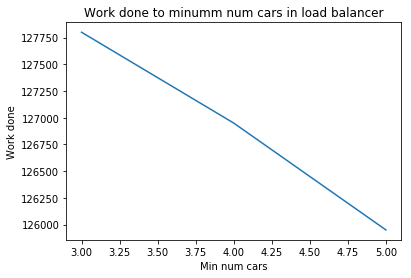

In [156]:
plt.plot(num_cars,work_done)
plt.title("Work done to minumm num cars in load balancer")
plt.xlabel("Min num cars")
plt.ylabel('Work done')
plt.show()

Now we will see the difference in work done for each individual microcloud

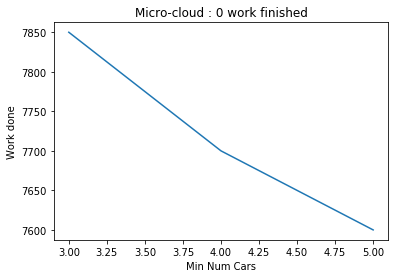

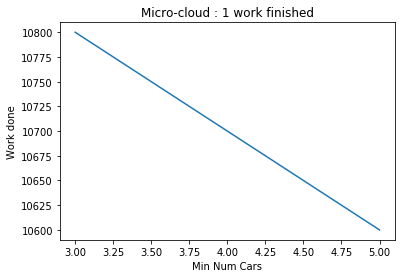

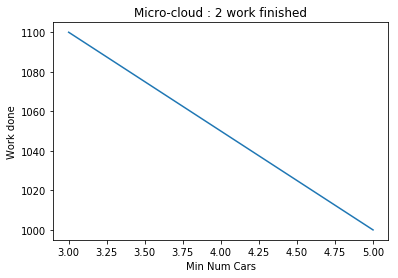

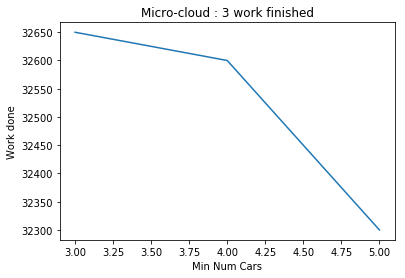

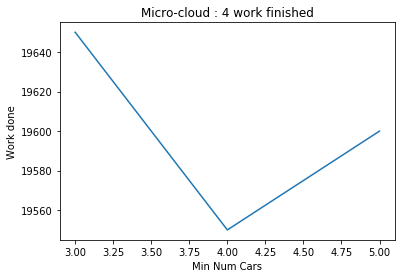

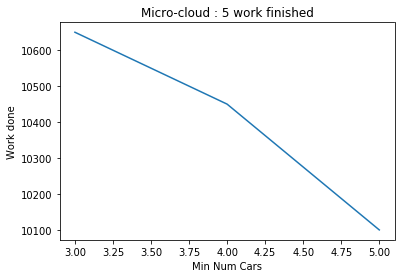

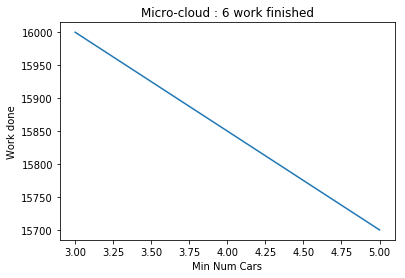

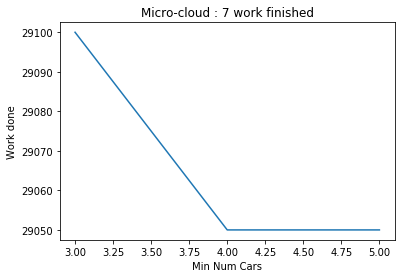

In [143]:
mcs = [i for i in range(8)]
for mc in mcs:
    mc_str = "Micro-cloud : "+str(mc)+ " work finished"
    mc_df  = realisitic_df[realisitic_df.name==mc_str]
    work_done = []
    for num_car in num_cars:
        parsed_series = mc_df[mc_df.min_num_cars == str(num_car)]['value']
        work_done.append(parsed_series[parsed_series.first_valid_index()])
    plt.title(mc_str)
    plt.plot(num_cars,work_done)
    plt.xlabel("Min Num Cars")
    plt.ylabel("Work done")
    plt.show()

Still the differences are pretty small, next we will try with much greater differences in the min num of cars

In [8]:
greater_diferences_df = pd.read_csv("greaterDifferencesRealisticScenario.csv")

In [6]:
def plot_differences_in_number_of_cars(df,attrs):
    realisitic_df = parse_df(df,attrs)
    num_cars = sorted(realisitic_df['min_num_cars'].unique().astype(int))
    work_df  = realisitic_df[realisitic_df.name=='Load Balancer : 2 work finished']
    work_done = []
    for num_car in num_cars:
        parsed_series = work_df[work_df.min_num_cars == str(num_car)]['value']
        work_done.append(parsed_series[parsed_series.first_valid_index()])
    plt.plot(num_cars,work_done)
    plt.title("Work done to minumm num cars in load balancer")
    plt.xlabel("Min num cars")
    plt.ylabel('Work done')
    plt.show()
    plt.bar(num_cars,work_done)
    plt.title("Work done to minumm num cars in load balancer")
    plt.xlabel("Min num cars")
    plt.ylabel('Work done')
    plt.show()
    mcs = [i for i in range(8)]
    for mc in mcs:
        mc_str = "Micro-cloud : "+str(mc)+ " work finished"
        mc_df  = realisitic_df[realisitic_df.name==mc_str]
        work_done = []
        for num_car in num_cars:
            parsed_series = mc_df[mc_df.min_num_cars == str(num_car)]['value']
            work_done.append(parsed_series[parsed_series.first_valid_index()])
        plt.title(mc_str)
        plt.plot(num_cars,work_done)
        plt.xlabel("Min Num Cars")
        plt.ylabel("Work done")
        plt.show()

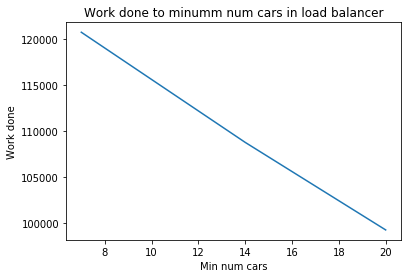

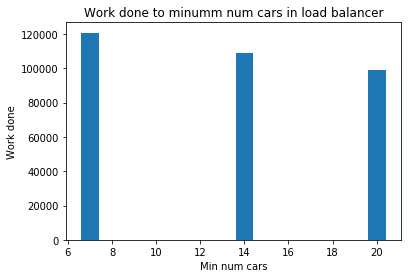

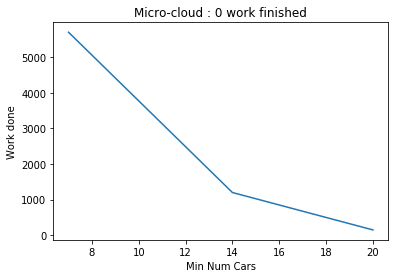

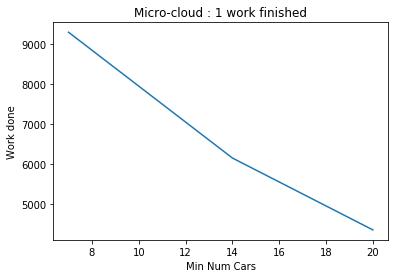

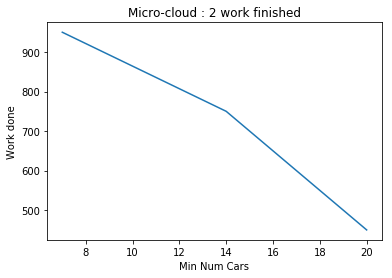

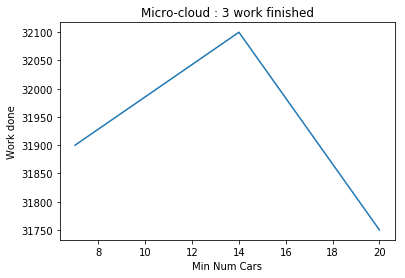

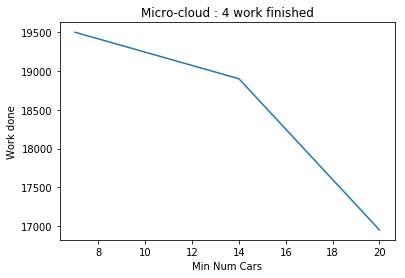

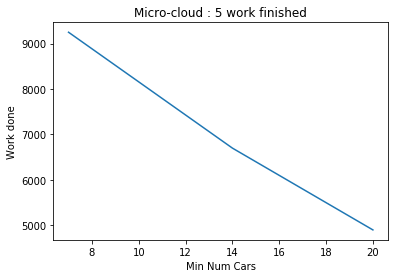

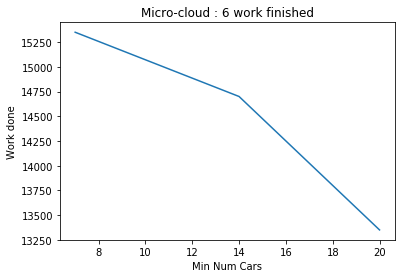

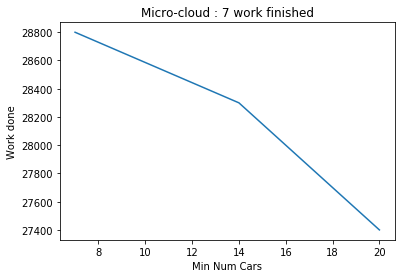

In [15]:
plot_differences_in_number_of_cars(greater_diferences_df,attrs)

As seen above the difference in the minimum number of cars needed affects much more some microclouds than others. Particularly, the clouds with greater trafic  and computation power, as cloud #3, will remain almost unaffected

In [3]:
times_series_df = pd.read_csv('mcsTimeSeries.csv')

In [10]:
times_series_df = times_series_df[['name','vectime','vecvalue']]

In [ ]:
times_series_df.iterrows

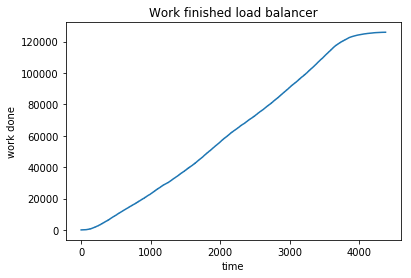

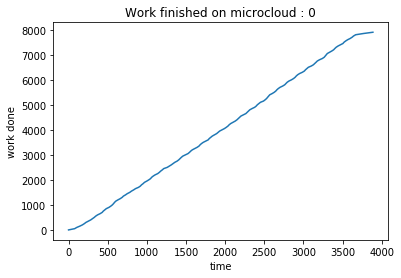

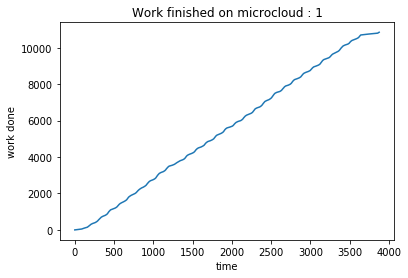

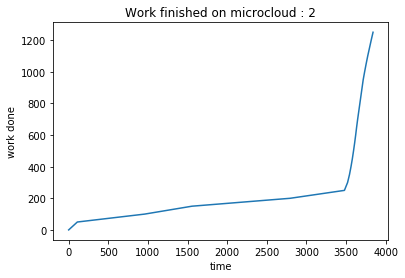

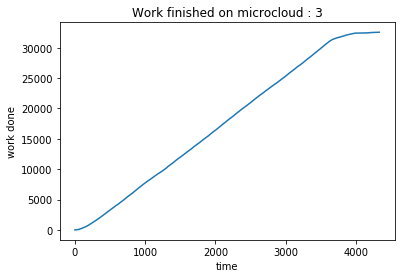

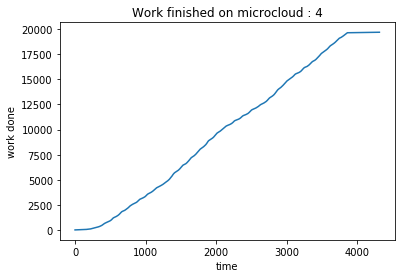

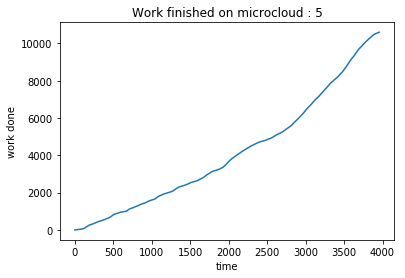

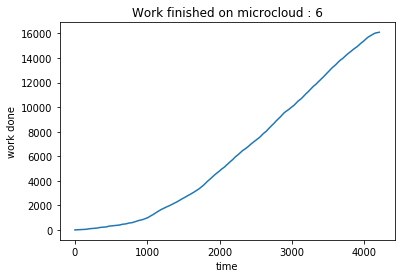

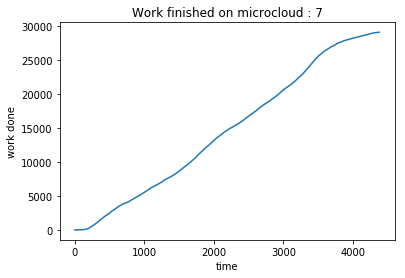

In [18]:
times_series_df = times_series_df.dropna()
for index,row in times_series_df.iterrows():
    times_series = [float(time) for time in row['vectime'].split(' ')]
    values = [float(value) for value in row['vecvalue'].split(' ')]
    plt.plot(times_series,values)
    plt.title(row['name'])
    plt.xlabel('time')
    plt.ylabel('work done')
    plt.show()